# Exploratory Data Analsis and Project Scope

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import utils

from datetime import datetime

### General Reference

In [3]:
airports = pd.read_csv('data/airport_codes.csv')

cities = pd.read_csv('data/us_cities_demographics.csv', delimiter=';')
weather = pd.read_csv('data/GlobalLandTemperaturesByCity.csv')

In [4]:
start_epoch = pd.Timestamp('1960-1-1')

In [1]:
with open('./data/I94_SAS_Labels_Descriptions.sas') as f:
    f_content = f.read()
    f_content = f_content.replace("\t", "")

In [8]:
type(f_content)

str

In [5]:
def code_mapper(file, label):
    """ Creates map b/t codes and descriptions/names.
    
    file: document that contains content
    label: The attribute that will be mapped.
    
    """
    file2 = file([filelabel)])
    file2 = file2[:file2.index(";")].sploit("\n")
    file2 = [item.replace("", "") for item in file2]
    content = [item.split("=") for item in file2[1:]]
    map_dict = {item[0].strip(): item[1].strip() for item in content if len(item) == 2}
    return map_dict

In [6]:
i94cit_res = code_mapper(f_content, "i94cntyl")

TypeError: 'str' object is not callable

---
## Airports

#### Notes
- Use iata_code as unique identifies. IATA = International Airport Transport Association


#### Extract Conditions
- iso_country = "US"
- type = "large_airport" or "medium_airport"


#### Errors
- Duplicate values
- Missing values - Do not accep

In [4]:
airports.type.unique()

array(['heliport', 'small_airport', 'closed', 'seaplane_base',
       'balloonport', 'medium_airport', 'large_airport'], dtype=object)

In [5]:
usa_med_large = airports[((airports.type == 'medium_airport') |
                          (airports.type == 'large_airport')) &
                         (airports.iso_country == 'US')].copy()
usa_med_large.head()

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
6188,5A8,medium_airport,Aleknagik / New Airport,66.0,NaN,US,US-AK,Aleknagik,5A8,WKK,5A8,"-158.617996216, 59.2826004028"
25825,K79J,medium_airport,South Alabama Regional At Bill Benton Field Ai...,310.0,NaN,US,US-AL,Andalusia/Opp,K79J,NaN,79J,"-86.393799, 31.3088"
26005,KABE,medium_airport,Lehigh Valley International Airport,393.0,NaN,US,US-PA,Allentown,KABE,ABE,ABE,"-75.44080352783203, 40.652099609375"
26006,KABI,medium_airport,Abilene Regional Airport,1791.0,NaN,US,US-TX,Abilene,KABI,ABI,ABI,"-99.68190002440001, 32.4113006592"
26007,KABQ,large_airport,Albuquerque International Sunport,5355.0,NaN,US,US-NM,Albuquerque,KABQ,ABQ,ABQ,"-106.609001, 35.040199"


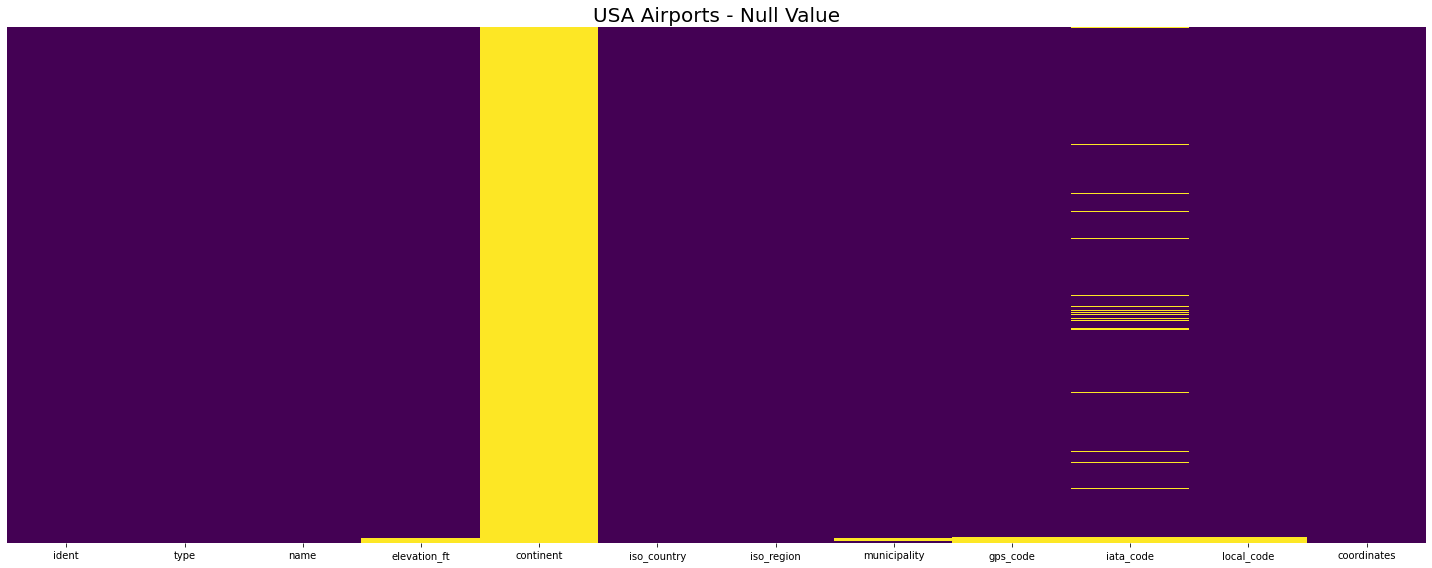

In [6]:
utils.plot_null_val_heatmap(usa_med_large, "USA Airports - Null Value", (20,8))

---
## USA Cities Demographics

#### Notes
- Can I join the `cities` dataset to `airports` dataset by the `City` feature  to the `municipality` feature?

In [7]:
cities.tail()

,City,State,Median Age,Male Population,Female Population,Total Population,Number of Veterans,Foreign-born,Average Household Size,State Code,Race,Count
2886,Stockton,California,32.5,150976.0,154674.0,305650,12822.0,79583.0,3.16,CA,American Indian and Alaska Native,19834
2887,Southfield,Michigan,41.6,31369.0,41808.0,73177,4035.0,4011.0,2.27,MI,American Indian and Alaska Native,983
2888,Indianapolis,Indiana,34.1,410615.0,437808.0,848423,42186.0,72456.0,2.53,IN,White,553665
2889,Somerville,Massachusetts,31.0,41028.0,39306.0,80334,2103.0,22292.0,2.43,MA,American Indian and Alaska Native,374
2890,Coral Springs,Florida,37.2,63316.0,66186.0,129502,4724.0,38552.0,3.17,FL,White,90896


In [8]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2891 entries, 0 to 2890
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   City                    2891 non-null   object 
 1   State                   2891 non-null   object 
 2   Median Age              2891 non-null   float64
 3   Male Population         2888 non-null   float64
 4   Female Population       2888 non-null   float64
 5   Total Population        2891 non-null   int64  
 6   Number of Veterans      2878 non-null   float64
 7   Foreign-born            2878 non-null   float64
 8   Average Household Size  2875 non-null   float64
 9   State Code              2891 non-null   object 
 10  Race                    2891 non-null   object 
 11  Count                   2891 non-null   int64  
dtypes: float64(6), int64(2), object(4)
memory usage: 271.2+ KB


---
## Visits

Need to convert countries to name

In [10]:
visits = pd.read_csv('data/immigration_data_sample.csv')

visits.rename({'Unnamed: 0': 'visit_id'}, axis=1, inplace=True)

In [11]:
visits.iloc[:, :30]

,visit_id,cicid,i94yr,i94mon,i94cit,i94res,i94port,arrdate,i94mode,i94addr,...,entdepu,matflag,biryear,dtaddto,gender,insnum,airline,admnum,fltno,visatype
0,2027561,4084316.0,2016.0,4.0,209.0,209.0,HHW,20566.0,1.0,HI,...,NaN,M,1955.0,07202016,F,NaN,JL,5.658267e+10,00782,WT
1,2171295,4422636.0,2016.0,4.0,582.0,582.0,MCA,20567.0,1.0,TX,...,NaN,M,1990.0,10222016,M,NaN,*GA,9.436200e+10,XBLNG,B2
2,589494,1195600.0,2016.0,4.0,148.0,112.0,OGG,20551.0,1.0,FL,...,NaN,M,1940.0,07052016,M,NaN,LH,5.578047e+10,00464,WT
3,2631158,5291768.0,2016.0,4.0,297.0,297.0,LOS,20572.0,1.0,CA,...,NaN,M,1991.0,10272016,M,NaN,QR,9.478970e+10,00739,B2
4,3032257,985523.0,2016.0,4.0,111.0,111.0,CHM,20550.0,3.0,NY,...,NaN,M,1997.0,07042016,F,NaN,NaN,4.232257e+10,LAND,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2117909,4288772.0,2016.0,4.0,135.0,135.0,LVG,20567.0,1.0,NV,...,NaN,M,1984.0,07212016,M,NaN,VS,5.914065e+10,00043,WT
996,1463022,2947585.0,2016.0,4.0,261.0,261.0,PSP,20560.0,1.0,HI,...,NaN,M,1981.0,10152016,M,NaN,SV,9.371186e+10,00041,B1
997,1414569,2883298.0,2016.0,4.0,111.0,111.0,MIA,20560.0,1.0,FL,...,NaN,M,1977.0,07142016,M,NaN,AF,5.627747e+10,00090,WT
998,1094181,2264857.0,2016.0,4.0,582.0,582.0,ATL,20556.0,1.0,WI,...,NaN,M,1981.0,10112016,M,NaN,EV,9.334035e+10,05510,B1


In [52]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   visit_id  1000 non-null   int64  
 1   cicid     1000 non-null   float64
 2   i94yr     1000 non-null   float64
 3   i94mon    1000 non-null   float64
 4   i94cit    1000 non-null   float64
 5   i94res    1000 non-null   float64
 6   i94port   1000 non-null   object 
 7   arrdate   1000 non-null   float64
 8   i94mode   1000 non-null   float64
 9   i94addr   941 non-null    object 
 10  depdate   951 non-null    float64
 11  i94bir    1000 non-null   float64
 12  i94visa   1000 non-null   float64
 13  count     1000 non-null   float64
 14  dtadfile  1000 non-null   int64  
 15  visapost  382 non-null    object 
 16  occup     4 non-null      object 
 17  entdepa   1000 non-null   object 
 18  entdepd   954 non-null    object 
 19  entdepu   0 non-null      float64
 20  matflag   954 non-null    objec

In [48]:
visits['arrdate'] = pd.to_timedelta(visits.arrdate, unit='D') + start_epoch
visits['depdate'] = pd.to_timedelta(visits.depdate, unit='D') + start_epoch
visits['biryear'] = visits.biryear.apply(int)

In [53]:
feats_to_drop =['i94yr', 'i94mon', 'insnum', 'dtadfile', 'fltno', 'i94bir', 'occup', 'matflag', 'admnum']
visits.drop(feats_to_drop, axis=1, inplace=True)

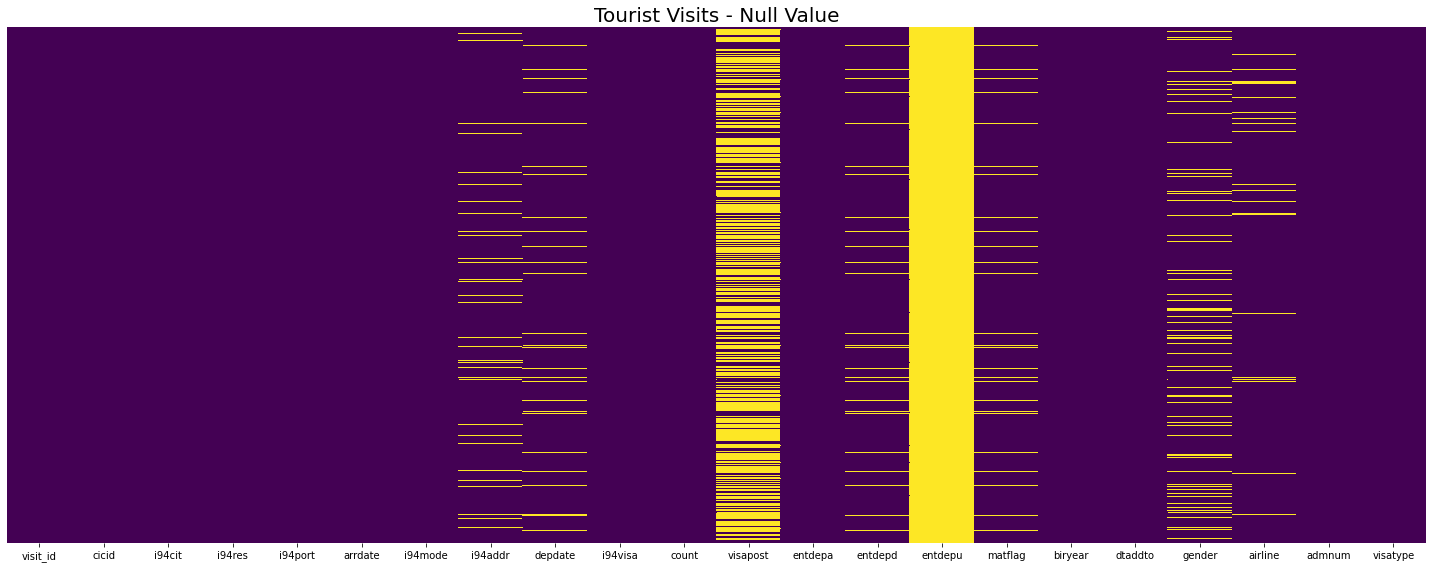

In [54]:
utils.plot_null_val_heatmap(visits, "Tourist Visits - Null Value", (20,8))

In [59]:
for col in visits.columns:
    print(f"{col}: {visits[col].nunique()}")

visit_id: 1000
cicid: 1000
i94cit: 88
i94res: 91
i94port: 70
arrdate: 30
i94mode: 4
i94addr: 51
depdate: 109
i94visa: 3
count: 1
visapost: 97
entdepa: 9
entdepd: 10
entdepu: 0
matflag: 1
biryear: 85
dtaddto: 99
gender: 3
airline: 101
admnum: 1000
visatype: 10


In [60]:
visits.matflag.unique()

array(['M', nan], dtype=object)

---
## Global Temperatures

In [14]:
weather = weather[weather.Country == 'United States'].copy()
weather.tail()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
8439242,2013-05-01,15.544,0.281,Yonkers,United States,40.99N,74.56W
8439243,2013-06-01,20.892,0.273,Yonkers,United States,40.99N,74.56W
8439244,2013-07-01,24.722,0.279,Yonkers,United States,40.99N,74.56W
8439245,2013-08-01,21.001,0.323,Yonkers,United States,40.99N,74.56W
8439246,2013-09-01,17.408,1.048,Yonkers,United States,40.99N,74.56W


In [17]:
num_unique_usa_cities = len(weather.City.unique())
print(f"# of unique US Cities: {num_unique_usa_cities}")

# of unique US Cities: 248


---
## Aggregation

In [30]:
labels = pd.read_sas('data/I94_SAS_Labels_Descriptions.sas', 'sas7bdat', encoding="ISO-8859-1")

ValueError: magic number mismatch (not a SAS file?)

In [29]:
# Number of cities that exist in BOTH "cities" and "usa_med_large" dfs.
# "cities" has a total of 2,891 cities.
len(set(cities.City).intersection(set(usa_med_large.municipality)))

217